In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
import warnings


warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_csv('C:/Users/Janus/Documents/Alejandro/1- Proyecto Ternium/dataset/bending_original.csv', sep=';', encoding='unicode_escape', low_memory=False)
data.insert(130, 'delta_bending', (data['PresetBending']-data['BENDING']))

In [3]:
features = data[['PROM_ESPESOR','KMS. APOYO', 'KMS. TRABAJO','Ancho','Bending jaula 4','COD DEFECTO','PresetBending','BENDING', 'Grado_1','delta_bending','MAX CUNIA', 'MAX CORONA', 'Tipo Acero','Relu', 'FUESE']]

for x in features.columns:
    vacio=features.loc[:,x].dropna().empty
    if vacio==True:
        features=features.drop(columns=[x])

features=features.drop('COD DEFECTO', axis = 'columns')

for x in features.columns:
# Construimos el modelo
      imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
      imputer.fit(features[[x]])
      features[x] = imputer.transform(features[[x]]).ravel()
'''''''Filtros'''''''

'''Estado de bobinas'''

# indexOk = features[features['COD DEFECTO'] != 'OK'].index
# features.drop(indexOk, inplace=True)

'''Fluencia'''

# indexTipo = features[features['Grado_1']!=7910].index
# features.drop(indexTipo, inplace=True)

'''Ancho'''

# indexEspesor1 = features[features['Ancho']<700].index
# features.drop(indexEspesor1, inplace=True)

# indexEspesor2 = features[features['Ancho']>1000].index
# features.drop(indexEspesor2, inplace=True)

'''Espesor'''

# indexEspesor2 = features[features['PROM_ESPESOR']>0].index
# features.drop(indexEspesor2, inplace=True)

# indexEspesor2 = features[features['PROM_ESPESOR']>1000].index
# features.drop(indexEspesor2, inplace=True)

'''Fuerza'''

# indexFuerza = features[features['FUESE']<110].index
# features.drop(indexFuerza, inplace=True)

# indexFuerza = features[features['FUESE']>150].index
# features.drop(indexFuerza, inplace=True)

'''KMS. APOYO'''

# indexApoyo = features[features['KMS. APOYO']<1000].index
# features.drop(indexApoyo, inplace=True)

# indexApoyo = features[features['KMS. APOYO']>1500].index
# features.drop(indexApoyo, inplace=True)

'''BENDING'''

# indexBENDING = features[features['BENDING']<-15].index
# features.drop(indexBENDING, inplace=True)

# indexBENDING = features[features['BENDING']>1500].index
# features.drop(indexBENDING, inplace=True)


features.shape

'''Grafico'''

# grouped_data = features.groupby('KMS. APOYO')
# Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
# Bending_by_tipo.plot(kind='bar', rot=90, figsize=(70,6))
# plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

'Grafico'

Text(0, 0.5, 'BENDING Promedio')

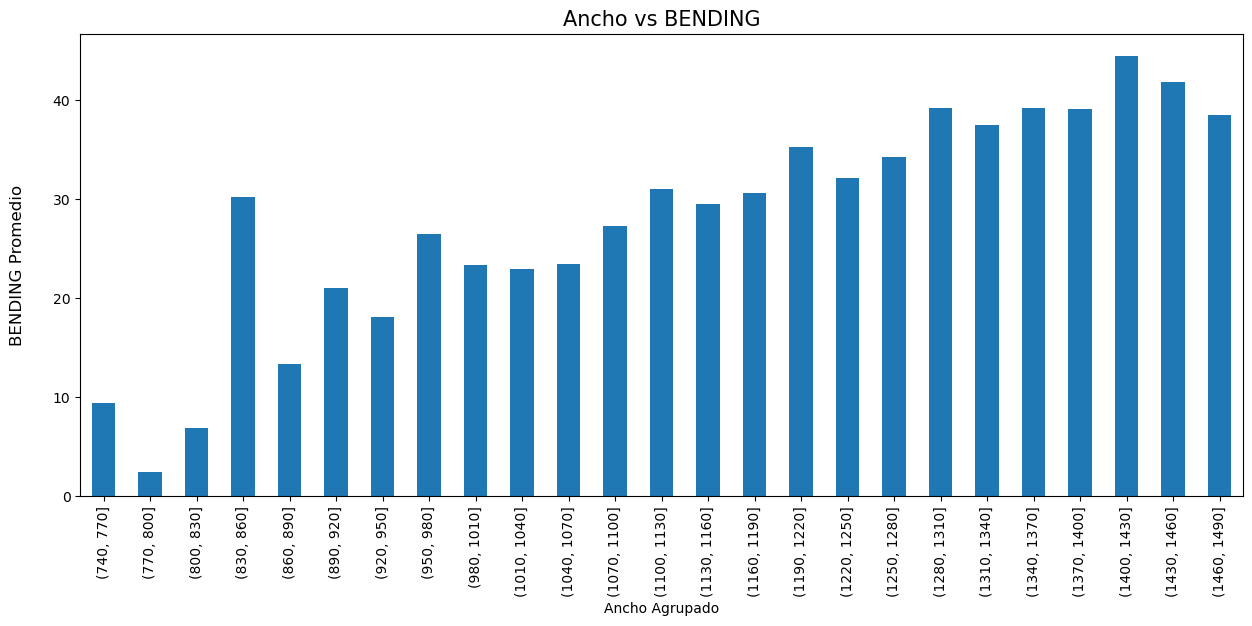

In [4]:
intervalo=pd.interval_range(start=740,end=1500, freq=30)
nuevo = pd.cut(features['Ancho'], intervalo)

features['Ancho Agrupado'] = nuevo

grouped_data = features.groupby('Ancho Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*-1
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(15,6))

plt.title('Ancho vs BENDING', size=15)
plt.ylabel('BENDING Promedio', labelpad=20.0, size=12)

In [5]:
features['Ancho Agrupado'].value_counts()

(1250, 1280]    4757
(1220, 1250]    2936
(1310, 1340]    2511
(920, 950]      2181
(1340, 1370]    2168
(1010, 1040]    2035
(1040, 1070]     765
(860, 890]       729
(1070, 1100]     569
(770, 800]       552
(1130, 1160]     510
(1280, 1310]     480
(1100, 1130]     441
(1400, 1430]     374
(1160, 1190]     371
(950, 980]       366
(800, 830]       366
(1460, 1490]     276
(1190, 1220]     260
(980, 1010]      241
(890, 920]       233
(1430, 1460]     212
(740, 770]       168
(1370, 1400]     156
(830, 860]        18
Name: Ancho Agrupado, dtype: int64

Text(0, 0.5, 'Bending Promedio')

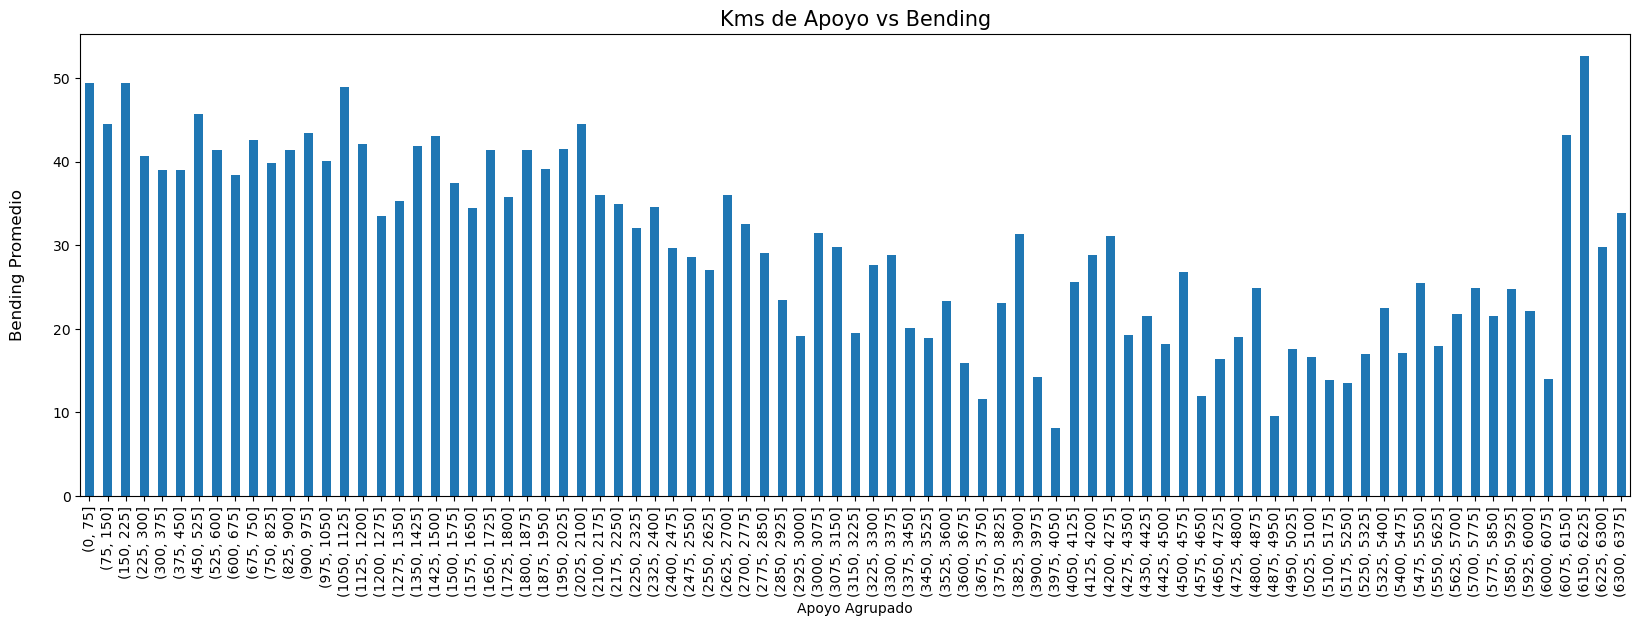

In [6]:
intervalo=pd.interval_range(start=0,end=6420, freq=75)
nuevo2 = pd.cut(features['KMS. APOYO'], intervalo)

features['Apoyo Agrupado'] = nuevo2

grouped_data = features.groupby('Apoyo Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Kms de Apoyo vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

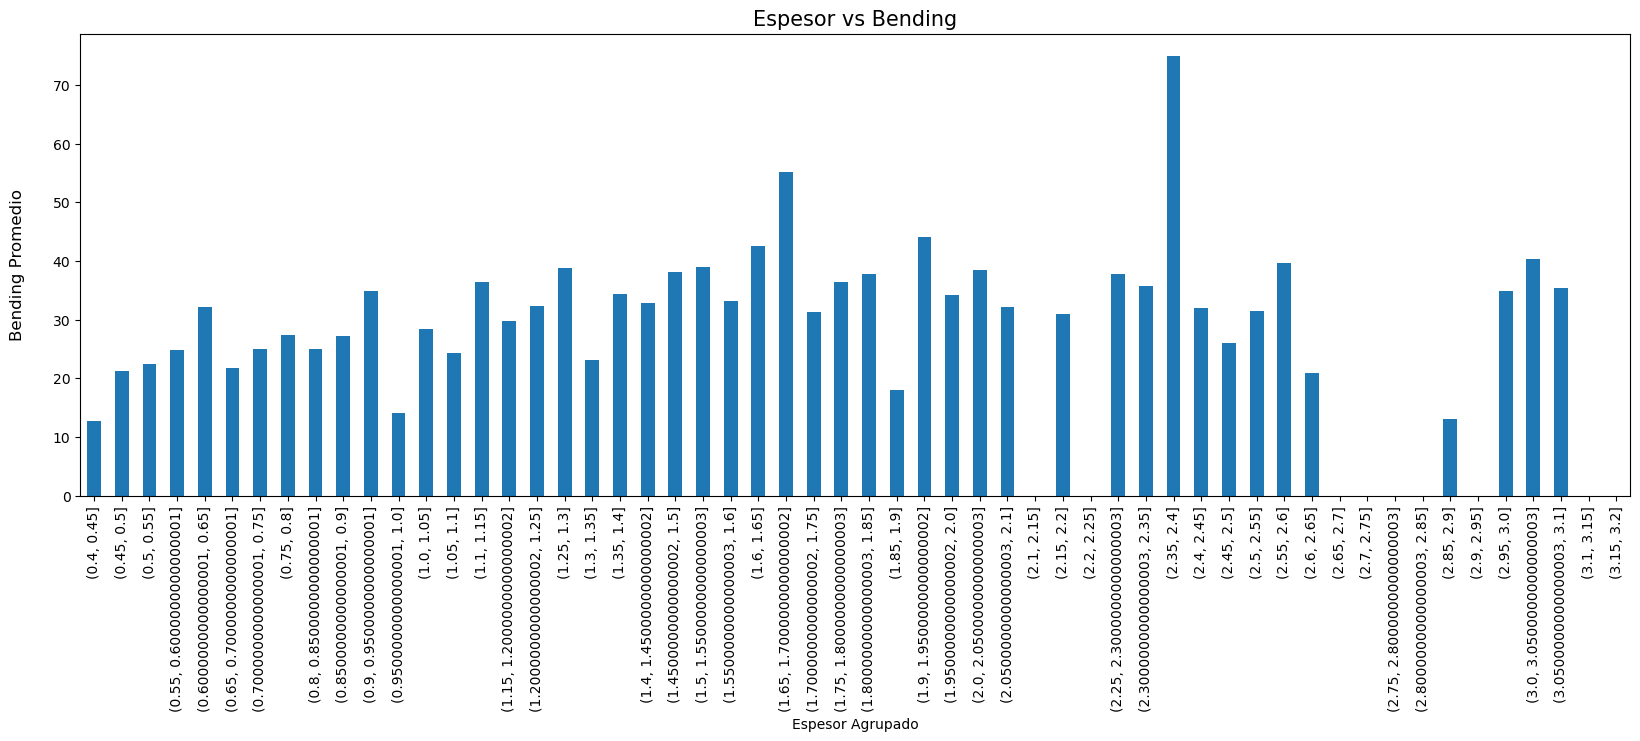

In [7]:
intervalo=pd.interval_range(start=0.4,end=3.2, freq=0.05)
nuevo2 = pd.cut(round(features['PROM_ESPESOR'],2), intervalo)

features['Espesor Agrupado'] = nuevo2

grouped_data = features.groupby('Espesor Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Espesor vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

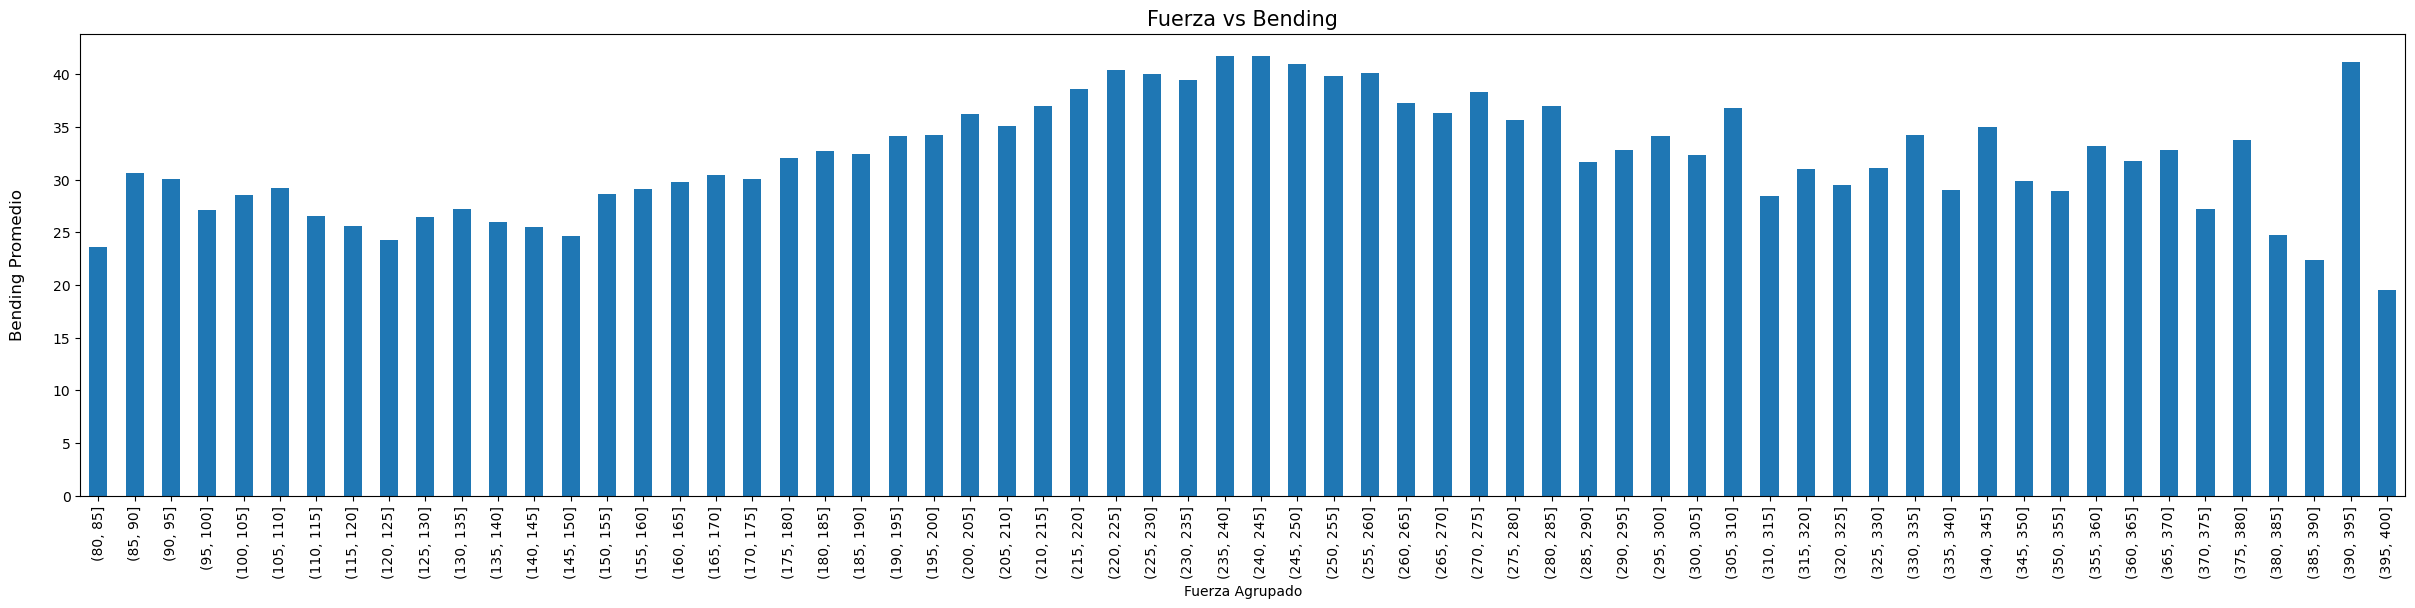

In [8]:
intervalo=pd.interval_range(start=80,end=400, freq=5)
nuevo2 = pd.cut(features['FUESE'], intervalo)

features['Fuerza Agrupado'] = nuevo2

grouped_data = features.groupby('Fuerza Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(30,6))

plt.title('Fuerza vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

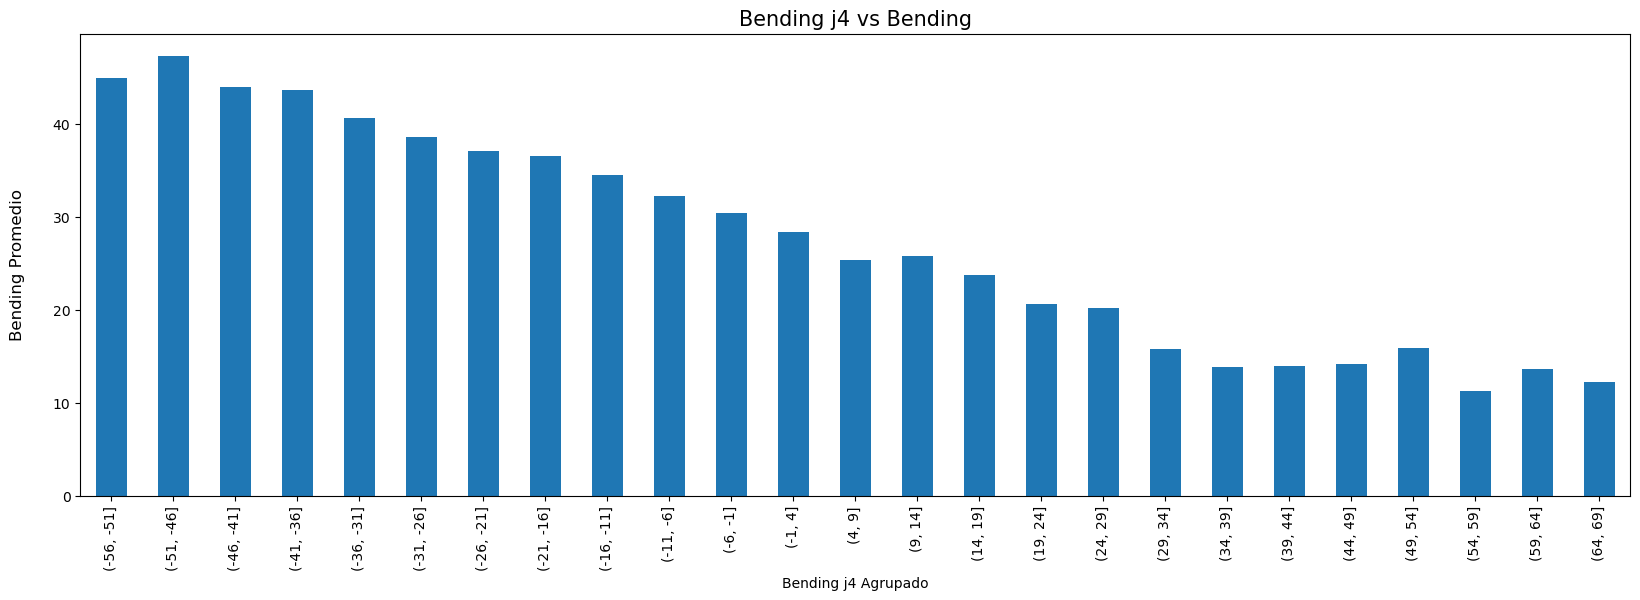

In [9]:
intervalo=pd.interval_range(start=-56,end=72, freq=5)
nuevo2 = pd.cut(features['Bending jaula 4'], intervalo)

features['Bending j4 Agrupado'] = nuevo2


grouped_data = features.groupby('Bending j4 Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Bending j4 vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

Text(0, 0.5, 'Bending Promedio')

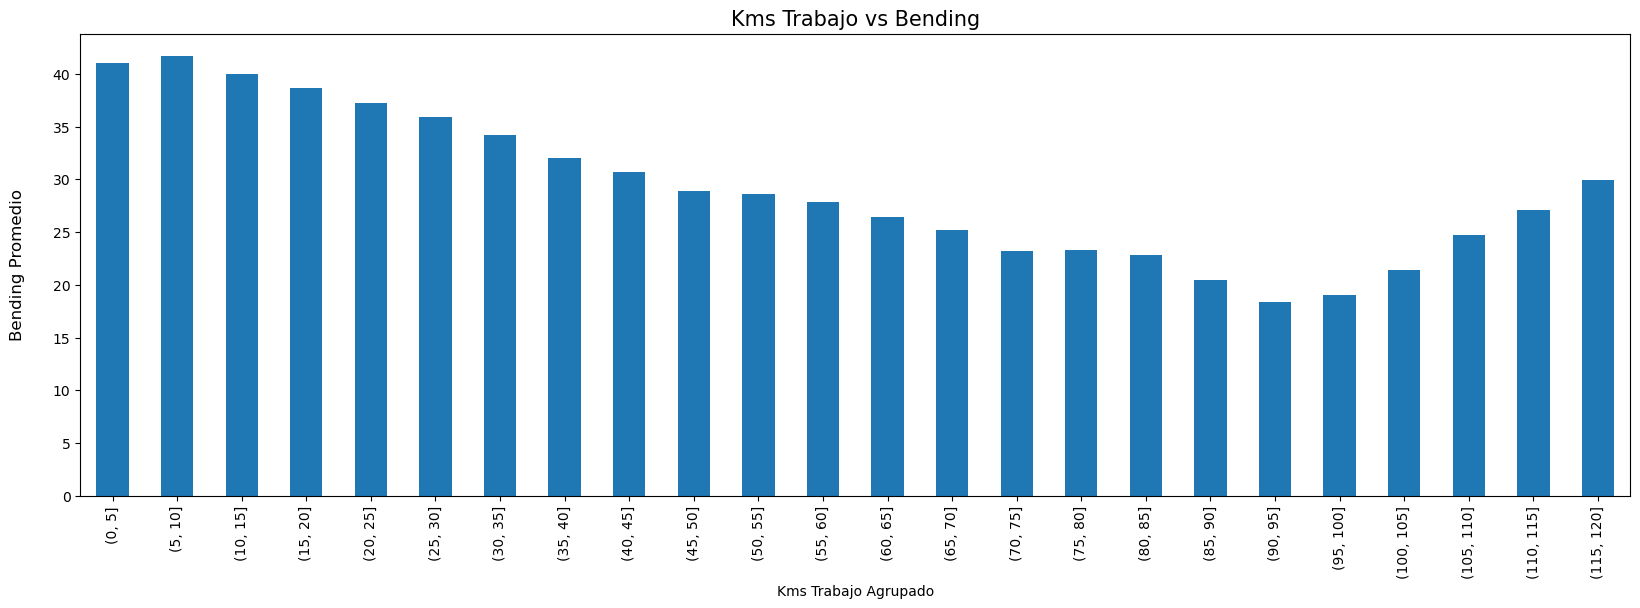

In [10]:
intervalo=pd.interval_range(start=0,end=120, freq=5)
nuevo2 = pd.cut(features['KMS. TRABAJO'], intervalo)

features['Kms Trabajo Agrupado'] = nuevo2

grouped_data = features.groupby('Kms Trabajo Agrupado')
Bending_by_tipo = grouped_data['BENDING'].mean()*(-1)
Bending_by_tipo.plot(kind='bar', rot=90, figsize=(20,6))

plt.title('Kms Trabajo vs Bending', size=15)
plt.ylabel('Bending Promedio', labelpad=20.0, size=12)

In [11]:
prueba=round(features,2)
prueba.head(5)

,PROM_ESPESOR,KMS. APOYO,KMS. TRABAJO,Ancho,Bending jaula 4,PresetBending,BENDING,Grado_1,delta_bending,MAX CUNIA,MAX CORONA,Tipo Acero,Relu,FUESE,Ancho Agrupado,Apoyo Agrupado,Espesor Agrupado,Fuerza Agrupado,Bending j4 Agrupado,Kms Trabajo Agrupado
0,1.27,2093.0,56.0,1337.0,10.38,-45.0,-33.0,7026.0,-12.0,6.58,46.67,183.0,-34.0,278.81,"(1310.0, 1340.0]","(2025, 2100]","(1.25, 1.3]","(275, 280]","(9, 14]","(55.0, 60.0]"
1,0.85,2094.0,57.0,940.0,36.68,-29.0,-32.0,7910.0,3.0,-17.00,45.91,214.0,-20.0,162.40,"(920.0, 950.0]","(2025, 2100]","(0.8, 0.8500000000000001]","(160, 165]","(34, 39]","(55.0, 60.0]"
2,0.85,2096.0,59.0,940.0,39.32,-29.0,-31.0,7910.0,2.0,-17.13,52.24,214.0,-32.0,146.08,"(920.0, 950.0]","(2025, 2100]","(0.8, 0.8500000000000001]","(145, 150]","(39, 44]","(55.0, 60.0]"
3,0.85,2099.0,62.0,940.0,39.93,-29.0,-29.0,7910.0,0.0,-16.46,55.64,214.0,-31.0,146.45,"(920.0, 950.0]","(2025, 2100]","(0.8, 0.8500000000000001]","(145, 150]","(39, 44]","(60.0, 65.0]"
4,1.52,2101.0,0.0,1548.0,-17.89,-54.0,-60.0,7026.0,6.0,34.06,63.24,183.0,-54.0,246.99,NaN,"(2100, 2175]","(1.5, 1.5500000000000003]","(245, 250]","(-21, -16]",NaN
